In [1]:
!pip install pycaret

     -------------------------------------- 483.6/483.6 kB 4.3 MB/s eta 0:00:00
     -------------------------------------- 150.0/150.0 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ------------------------------------- 298.0/298.0 kB 19.2 MB/s eta 0:00:00
     ---------------------------------------- 44.0/44.0 kB ? eta 0:00:00
     ---------------------------------------- 106.8/106.8 kB ? eta 0:00:00
     -------------------------------------- 81.9/81.9 kB 138.9 kB/s eta 0:00:00
     ---------------------------------------- 1.0/1.0 MB 16.4 MB/s eta 0:00:00
     ------------------------------------- 569.7/569.7 kB 35.0 MB/s eta 0:00:00
     ---------------------------------------- 65.9/65.9 MB 6.4 MB/s eta 0:00:00
     ---------------------------------------- 16.1/16.1 MB 5.1 MB/s eta 0:00:00
     ---------------------------------------- 46.4/46.4 kB 2.3 MB/s eta 0:00:00
  Installing build dependencies

In [2]:
!pip install scipy

In [1]:
# Importando bibliotecas necessárias
import pandas as pd
import sweetviz as sv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import shap
from pycaret.regression import *
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

In [2]:
df= pd.read_excel("Base_novo_teste.xlsx")

In [3]:
df = df[['qtd_abertas_Empresario_Individual','Mecanismos_incentivo','Reducao_IPTU', 'Isencao_IPTU', 'Reducao_ISSQN','Isencao_ISSQN','Isencao_Tx','Cessao_terrenos',
    'Doacao_terrenos','Outros_mecanismos','taxa_homicidio','RH_adm_dir','ISH','densidade_banda_larga','densidade_telefonia_movel','qtd_cursos_engenharias',
    'qtd_cursos_negocios_direito','media_notas_CN','media_notas_CH','media_NU_NOTA_LC','media_NU_NOTA_MT',
    'media_NU_NOTA_REDACAO','valor_medio_recebido_familia','pib_per_capita_preco_corrente','perc_20_59_anos','pop_total','total_sim_tecnologia','porte_municipio']]

In [4]:
df.head()

,qtd_abertas_Empresario_Individual,Mecanismos_incentivo,Reducao_IPTU,Isencao_IPTU,Reducao_ISSQN,Isencao_ISSQN,Isencao_Tx,Cessao_terrenos,Doacao_terrenos,Outros_mecanismos,...,media_notas_CH,media_NU_NOTA_LC,media_NU_NOTA_MT,media_NU_NOTA_REDACAO,valor_medio_recebido_familia,pib_per_capita_preco_corrente,perc_20_59_anos,pop_total,total_sim_tecnologia,porte_municipio
0,194,Não,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,504.034091,491.079545,543.558537,621.363636,18495,25091.18,0.587227,22516,18.0,2
1,1275,Sim,Sim,Sim,Não,Não,Sim,Não,Sim,Sim,...,495.727950,484.710248,518.811149,584.534161,17615,25730.20,0.591797,111148,12.0,4
2,49,Sim,Não,Não,Não,Sim,Não,Não,Não,Sim,...,486.071429,447.628571,522.883333,471.428571,18956,32226.25,0.584567,5067,8.0,1
3,1258,Sim,Não,Sim,Sim,Não,Sim,Sim,Sim,Não,...,505.006061,490.991919,533.458933,611.717172,19376,29331.29,0.595584,86416,17.0,3
4,257,Sim,Não,Sim,Não,Não,Não,Não,Não,Não,...,477.045714,454.722857,480.696875,576.571429,17752,37069.25,0.598272,16088,8.0,2


In [5]:
df['qtd_cursos_engenharias'] = df['qtd_cursos_engenharias'].fillna(0)

df['qtd_cursos_negocios_direito'] = df['qtd_cursos_negocios_direito'].fillna(0)

df['total_sim_tecnologia'] = df['total_sim_tecnologia'].fillna(0)

df['taxa_homicidio'] = df['taxa_homicidio'].fillna(0)

df['RH_adm_dir'] = df['RH_adm_dir'].fillna(0)

In [6]:
df[['Mecanismos_incentivo','Reducao_IPTU', 'Isencao_IPTU', 'Reducao_ISSQN','Isencao_ISSQN','Isencao_Tx','Cessao_terrenos',
    'Doacao_terrenos','Outros_mecanismos']] = df[['Mecanismos_incentivo','Reducao_IPTU', 'Isencao_IPTU', 'Reducao_ISSQN','Isencao_ISSQN','Isencao_Tx','Cessao_terrenos',
    'Doacao_terrenos','Outros_mecanismos']].fillna('Não')

In [7]:
df[['media_notas_CN','media_notas_CH','media_NU_NOTA_LC','media_NU_NOTA_MT',
    'media_NU_NOTA_REDACAO']] = df[['media_notas_CN','media_notas_CH','media_NU_NOTA_LC','media_NU_NOTA_MT',
    'media_NU_NOTA_REDACAO']].fillna(df[['media_notas_CN','media_notas_CH','media_NU_NOTA_LC','media_NU_NOTA_MT',
    'media_NU_NOTA_REDACAO']].median())


In [8]:
df = pd.get_dummies(df, columns = ['Mecanismos_incentivo','Reducao_IPTU', 'Isencao_IPTU', 'Reducao_ISSQN','Isencao_ISSQN','Isencao_Tx','Cessao_terrenos',
    'Doacao_terrenos','Outros_mecanismos','ISH'], drop_first=True)

In [9]:
df = df[np.isfinite(df).all(1)]

In [10]:
# vamos separar duas bases, uma para treino e outra para teste
treino = df.sample(frac=.8, random_state=123)
treino.reset_index(inplace=True, drop=True)


teste = df.drop(treino.index)
teste.reset_index(inplace=True, drop=True)

print(treino.shape, teste.shape)

(4456, 31) (1114, 31)


## Tratamento

In [11]:
regression_setup = setup(data = treino,target = 'qtd_abertas_Empresario_Individual' )

,Description,Value
0,Session id,4116
1,Target,qtd_abertas_Empresario_Individual
2,Target type,Regression
3,Original data shape,"(4456, 31)"
4,Transformed data shape,"(4456, 31)"
5,Transformed train set shape,"(3119, 31)"
6,Transformed test set shape,"(1337, 31)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


In [12]:
best_model = compare_models(fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
en,Elastic Net,154.9587,356533.0754,576.1881,0.9432,0.9219,1.4994,0.1280
lasso,Lasso Regression,160.7271,360584.3238,578.8270,0.9429,0.9554,1.6285,0.9100
llar,Lasso Least Angle Regression,160.7375,361252.0188,579.2950,0.9428,0.9559,1.6283,0.0920
lr,Linear Regression,163.3574,364924.7581,581.6481,0.9427,0.9702,1.6776,1.1260
ridge,Ridge Regression,162.7324,364591.0239,581.4991,0.9427,0.9667,1.6586,0.0780
lar,Least Angle Regression,167.3685,367420.9193,583.1642,0.9427,0.9986,1.8075,0.0840
br,Bayesian Ridge,154.2928,357434.4439,577.9569,0.9427,0.9270,1.4778,0.0820
huber,Huber Regressor,136.5108,315154.9629,552.8398,0.9385,0.7189,0.7357,0.1540
omp,Orthogonal Matching Pursuit,212.9958,1448759.7763,1016.7538,0.9134,1.1327,2.2856,0.0800
par,Passive Aggressive Regressor,210.2744,696978.3942,798.6601,0.9077,0.9972,1.6252,0.0840


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [14]:
# verificando os hiperparâmetros do modelo 

print(best_model)

ElasticNet(random_state=4116)


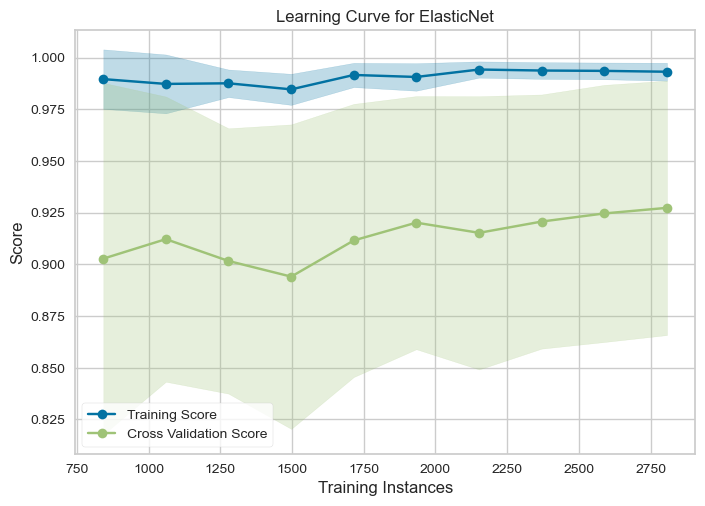

In [15]:
plot_model(best_model, plot = 'learning', use_train_data = True)

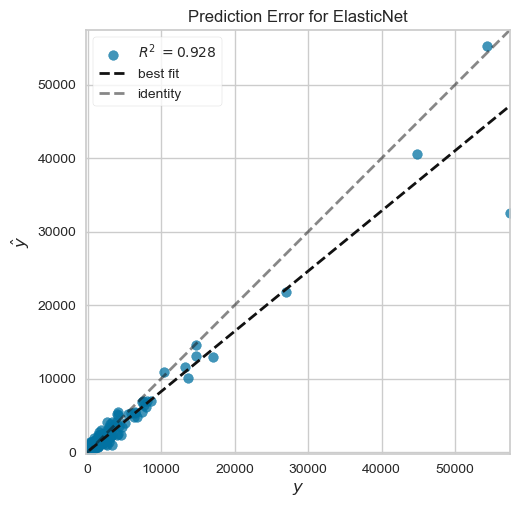

In [16]:
plot_model(best_model, plot='error')

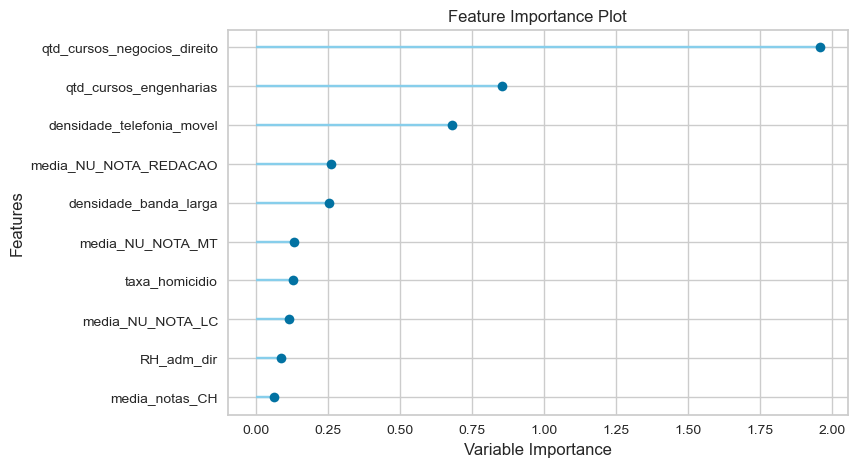

In [40]:
plot_model(best_model, plot='feature')

In [17]:
interpret_model(best_model, plot = 'summary')

TypeError: This function only supports tree based models for binary classification: rf, et, dt, xgboost, lightgbm.